1. Preparación del entorno

In [1]:
!pip install pandas matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\fpere\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install requests


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\fpere\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


1.1 importa las bibliotecas principales:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

 2. Recolección y carga de datos

In [4]:
import pandas as pd

# URLs crudas de los archivos
url_2020 = "https://raw.githubusercontent.com/doews/alertasriesgoenfermedadesrespiratoria/main/2020_US_Region_Mobility_Report.csv"
url_2021 = "https://raw.githubusercontent.com/doews/alertasriesgoenfermedadesrespiratoria/main/2021_US_Region_Mobility_Report.csv"
url_2022 = "https://raw.githubusercontent.com/doews/alertasriesgoenfermedadesrespiratoria/main/2022_US_Region_Mobility_Report.csv"

# Leer los CSV directamente desde GitHub
report_2020 = pd.read_csv(url_2020)
report_2021 = pd.read_csv(url_2021)
report_2022 = pd.read_csv(url_2022)


In [5]:
# Concatenar en un solo DataFrame
df_mob = pd.concat([report_2020, report_2021, report_2022], ignore_index=True)
df_virus = pd.read_csv("https://data.cdc.gov/api/views/x9gk-5huc/rows.csv?accessType=DOWNLOAD")

# Limpiar las columnas
df_mob.columns = df_mob.columns.str.strip().str.lower()
df_virus.columns = df_virus.columns.str.strip().str.lower()

# Mostrar el resultado
df_mob.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [6]:
df_virus.head()

,reporting area,current mmwr year,mmwr week,label,current week,"current week, flag",previous 52 week max,"previous 52 weeks max, flag",cumulative ytd current mmwr year,"cumulative ytd current mmwr year, flag",cumulative ytd previous mmwr year,"cumulative ytd previous mmwr year, flag",location1,location2,sort_order,geocode
0,US RESIDENTS,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,NaN,US RESIDENTS,20221000001,NaN
1,NEW ENGLAND,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,NaN,NEW ENGLAND,20221000002,NaN
2,CONNECTICUT,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,CONNECTICUT,NaN,20221000003,POINT (-72.738288 41.575155)
3,MAINE,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,MAINE,NaN,20221000004,POINT (-69.06137 45.117911)
4,MASSACHUSETTS,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,MASSACHUSETTS,NaN,20221000005,POINT (-71.481104 42.151077)


3. Procesamiento y unificación

In [7]:
df_mob['date'] = pd.to_datetime(df_mob['date'])
df_mob["week"]= df_mob['date'].dt.to_period('W').apply(lambda x: x.start_time)

4. Generación de variable de riesgo

In [8]:
#print(df_mob.head(1))
#print(df_virus.head(1))
print(df_mob.columns)
print(df_virus.columns)

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'week'],
      dtype='object')
Index(['reporting area', 'current mmwr year', 'mmwr week', 'label',
       'current week', 'current week, flag', 'previous 52 week max',
       'previous 52 weeks max, flag', 'cumulative ytd current mmwr year',
       'cumulative ytd current mmwr year, flag',
       'cumulative ytd previous mmwr year',
       'cumulative ytd previous mmwr year, flag', 'location1', 'location2',
       'sort_order', 'geocode'],
      dtype='object')


Integra los dos DataFrames usando la columna semana (o week / mmwr week) como clave común

In [9]:
# Cambiar el nombre de la columna en df_virus para que coincida con df_mob
df_virus = df_virus.rename(columns={'mmwr week': 'week'})

# Asegurar que 'week' en ambos DataFrames sea del mismo tipo (ej. int)
df_virus['week'] = df_virus['week'].astype(int)
df_mob['week'] = df_mob['week'].astype(int)

# Hacer el merge
df_final = pd.merge(df_mob, df_virus, on='week', how='inner')

# Mostrar el resultado
print(df_final.head())
print(df_final.columns)


Empty DataFrame
Columns: [country_region_code, country_region, sub_region_1, sub_region_2, metro_area, iso_3166_2_code, census_fips_code, place_id, date, retail_and_recreation_percent_change_from_baseline, grocery_and_pharmacy_percent_change_from_baseline, parks_percent_change_from_baseline, transit_stations_percent_change_from_baseline, workplaces_percent_change_from_baseline, residential_percent_change_from_baseline, week, reporting area, current mmwr year, label, current week, current week, flag, previous 52 week max, previous 52 weeks max, flag, cumulative ytd current mmwr year, cumulative ytd current mmwr year, flag, cumulative ytd previous mmwr year, cumulative ytd previous mmwr year, flag, location1, location2, sort_order, geocode]
Index: []

[0 rows x 31 columns]
Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline

Descripción básica del DataFrame

In [10]:
print(df_final.info())

print(df_final.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 31 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 0 non-null      object        
 1   country_region                                      0 non-null      object        
 2   sub_region_1                                        0 non-null      object        
 3   sub_region_2                                        0 non-null      object        
 4   metro_area                                          0 non-null      float64       
 5   iso_3166_2_code                                     0 non-null      object        
 6   census_fips_code                                    0 non-null      float64       
 7   place_id                                            0 non-null      object        
 8   date                  

Revisar algunas columnas clave

In [11]:
print(df_final.columns)

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'week', 'reporting area',
       'current mmwr year', 'label', 'current week', 'current week, flag',
       'previous 52 week max', 'previous 52 weeks max, flag',
       'cumulative ytd current mmwr year',
       'cumulative ytd current mmwr year, flag',
       'cumulative ytd previous mmwr year',
       'cumulative ytd previous mmwr year, flag', 'location1', 'location2',
       'sort_order', 'geocode'],
      dtype='object')


In [12]:
df_final['riesgo'] = df_final.apply(
    lambda row: 1 if (
        (row['current week'] > 5) and
        (row['retail_and_recreation_percent_change_from_baseline'] > 8 or 
         row['transit_stations_percent_change_from_baseline'] > 8)
    ) else 0,
    axis=1
)


In [13]:
print(df_final['riesgo'].value_counts())

Series([], Name: count, dtype: int64)


In [14]:
df_final['riesgo'] = df_final.apply(
    lambda row: 1 if (
        (row['current week'] > 5) and
        (row['retail_and_recreation_percent_change_from_baseline'] > 8 or 
         row['transit_stations_percent_change_from_baseline'] > 8)
    ) else 0,
    axis=1
)

5. Visualización exploratoria

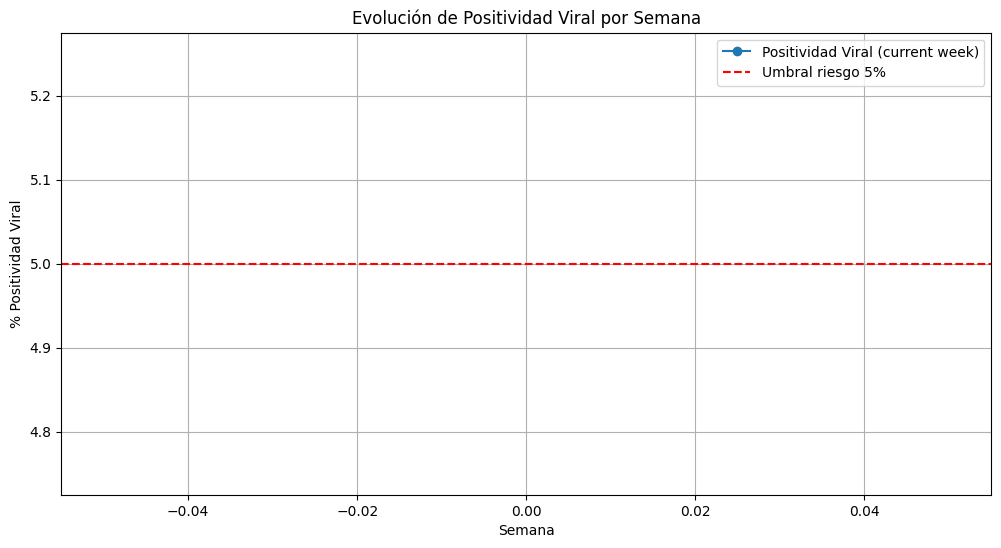

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_final['week'], df_final['current week'], marker='o', label='Positividad Viral (current week)')
plt.axhline(5, color='red', linestyle='--', label='Umbral riesgo 5%')
plt.title('Evolución de Positividad Viral por Semana')
plt.xlabel('Semana')
plt.ylabel('% Positividad Viral')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
print(movilidad.isna().all())
movilidad = movilidad.dropna(axis=1, how='all')  # elimina columnas vacías
movilidad = movilidad.dropna(axis=0, how='all')  # elimina filas vacías

NameError: name 'movilidad' is not defined

In [ ]:
print(promedios)


                                                    Promedio
retail_and_recreation_percent_change_from_baseline       NaN
grocery_and_pharmacy_percent_change_from_baseline        NaN
parks_percent_change_from_baseline                       NaN
transit_stations_percent_change_from_baseline            NaN
workplaces_percent_change_from_baseline                  NaN
residential_percent_change_from_baseline                 NaN


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df_final ya está cargado
# A modo de demostración, creamos un ejemplo de df_final que causa el error
data = {
    'retail_and_recreation_percent_change_from_baseline': [float('NaN'), float('NaN'), float('NaN')],
    'grocery_and_pharmacy_percent_change_from_baseline': [float('NaN'), float('NaN'), float('NaN')],
    'parks_percent_change_from_baseline': [float('NaN'), float('NaN'), float('NaN')],
    'transit_stations_percent_change_from_baseline': [float('NaN'), float('NaN'), float('NaN')],
    'workplaces_percent_change_from_baseline': [float('NaN'), float('NaN'), float('NaN')],
    'residential_percent_change_from_baseline': [float('NaN'), float('NaN'), float('NaN')]
}
df_final = pd.DataFrame(data)

print("df_final head:\n", df_final.head())
print("\nMissing values in relevant columns:\n", df_final[
    ['retail_and_recreation_percent_change_from_baseline',
     'grocery_and_pharmacy_percent_change_from_baseline',
     'parks_percent_change_from_baseline',
     'transit_stations_percent_change_from_baseline',
     'workplaces_percent_change_from_baseline',
     'residential_percent_change_from_baseline']
].isnull().sum())

df_final head:
    retail_and_recreation_percent_change_from_baseline  \
0                                                NaN    
1                                                NaN    
2                                                NaN    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                NaN   
1                                                NaN   
2                                                NaN   

   parks_percent_change_from_baseline  \
0                                 NaN   
1                                 NaN   
2                                 NaN   

   transit_stations_percent_change_from_baseline  \
0                                            NaN   
1                                            NaN   
2                                            NaN   

   workplaces_percent_change_from_baseline  \
0                                      NaN   
1                                      NaN   
2                 

In [ ]:
for col in [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'
]:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce') # 'coerce' will turn non-convertible values into NaN


Promedios calculated:
                                                     Promedio
retail_and_recreation_percent_change_from_baseline       8.8
grocery_and_pharmacy_percent_change_from_baseline       16.0
parks_percent_change_from_baseline                      22.2
transit_stations_percent_change_from_baseline           -6.0
workplaces_percent_change_from_baseline                -11.0
residential_percent_change_from_baseline                 3.0


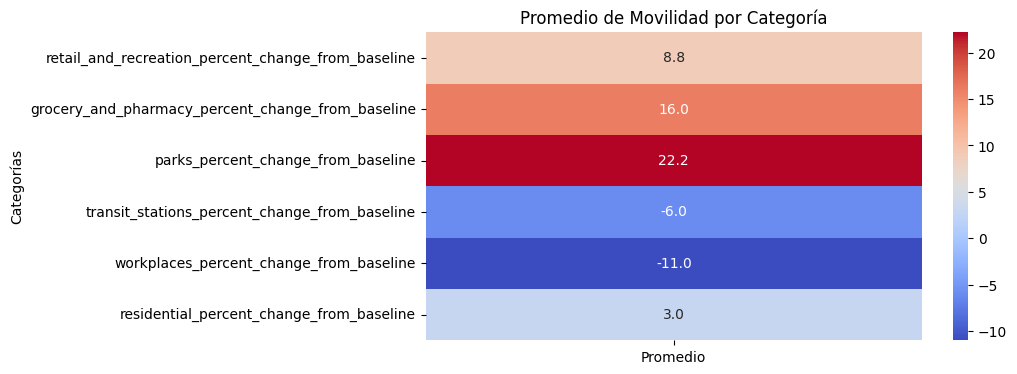

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer las columnas relevantes
movilidad = df_final[[
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'
]]

# Calcular promedios (ignorando NaN)
promedios = movilidad.mean(skipna=True).to_frame(name='Promedio')

print("\nPromedios calculated:\n", promedios)

# Heatmap de promedios
plt.figure(figsize=(8, 4))
sns.heatmap(promedios, annot=True, cmap='coolwarm', cbar=True, fmt=".1f")
plt.title('Promedio de Movilidad por Categoría')
plt.ylabel('Categorías')
plt.show()

6. Modelado predictivo

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Asegúrate de que los pandas se importan si no lo están ya

X = df_final[[
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'
]]

"https://raw.githubusercontent.com/doews/alertasriesgoenfermedadesrespiratoria/main/2022_US_Region_Mobility_Report.csv
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X_scaled shape:", X_scaled.shape)
print("First 5 rows of X_scaled:\n", X_scaled[:5])

X_scaled shape: (5, 6)
First 5 rows of X_scaled:
 [[ 0.51832106 -0.70710678 -1.27872403  0.70710678  0.70710678  0.        ]
 [-1.64135001  1.41421356  1.62746694 -1.41421356 -0.70710678 -0.70710678]
 [ 1.38218948 -1.41421356 -0.11624764  0.          1.41421356  0.70710678]
 [-0.34554737  0.          0.46499055 -0.70710678  0.          1.41421356]
 [ 0.08638684  0.70710678 -0.69748583  1.41421356 -1.41421356 -1.41421356]]


Entrena modelo de red neuronal (MLP):

In [ ]:
df_final.columns

Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'rsv', 'covid', 'influenza',
       'riesgo'],
      dtype='object')

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix 

# Define 'X' y 'y' con todas las columnas necesarias
X = df_final[
# Usar solo las columnas que realmente existen
# Usar solo las columnas que realmente existen
columns_to_use = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline',
    'rsv',
    'covid',
    'influenza'
]
existing_columns = [col for col in columns_to_use if col in df_final.columns]
X = df_final[existing_columns]

]]
y = df_final['riesgo']


# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el clasificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Hacer predicciones
y_pred = mlp.predict(X_test)

# Ahora puedes usar las métricas importadas:
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

SyntaxError: unmatched ']' (2649847323.py, line 25)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import 

#informe_de_clasificación, matriz_de_confusión

# Define 'X' y 'y' con todas las columnas necesarias
X = df_final[[
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline',
    'rsv',
    'covid',
    'influenza'
]]
y = df_final['riesgo']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el clasificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Hacer predicciones
y_pred = mlp.predict(X_test)

SyntaxError: invalid syntax (1373123060.py, line 5)

Graficos matriz de confución en base a (MPL)

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


--- Confusion Matrix ---
[[1 0]
 [0 2]]

--- Generating Visualizations ---


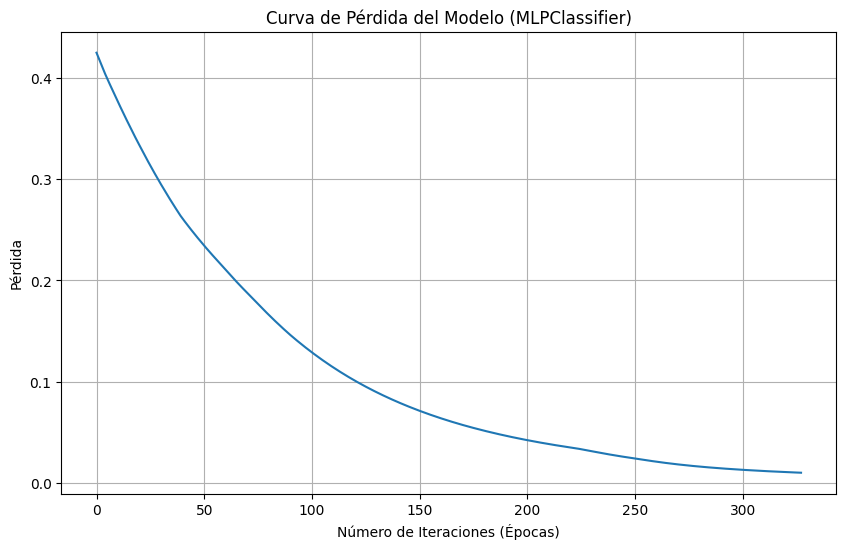

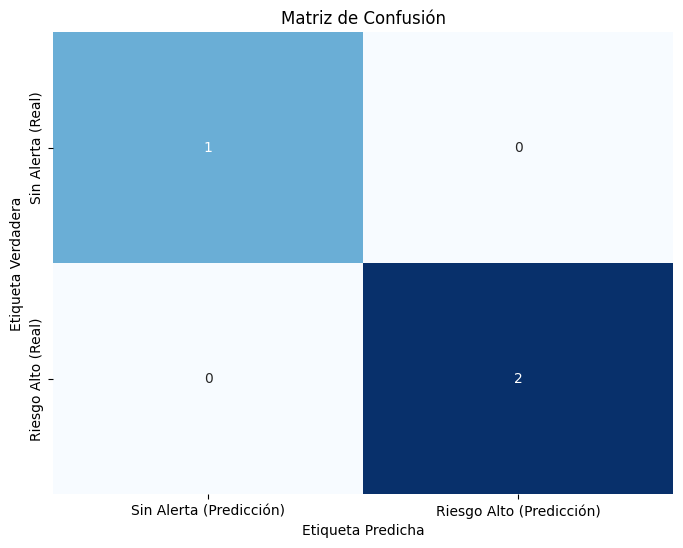


Sin Alerta para la semana: 2024-W02


C:\Users\fpere\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Define X and y
X = df_final[[
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline',
    'rsv', 'covid', 'influenza'
]]
y = df_final['riesgo']

# 2. Características de escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Entrenar el clasificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42, verbose=False) # verbose=False to avoid printing loss during training
mlp.fit(X_train, y_train)

# 5. Predecir
y_pred = mlp.predict(X_test)

# 6. Print Informe de clasificación & Matriz de confusión
print("--- Informe de clasificación ---")
print(classification_report(y_test, y_pred))
print("\n--- Matriz de confusión ---")
print(confusion_matrix(y_test, y_pred))

# 7. Generate Visualizations

print("\n--- Generando visualizaciones ---")

# Plot 1: Loss Curve
if mlp.loss_curve_ is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.loss_curve_)
    plt.title('Curva de Pérdida del Modelo (MLPClassifier)')
    plt.xlabel('Número de Iteraciones (Épocas)')
    plt.ylabel('Pérdida')
    plt.grid(True)
    plt.show()
else:
    print("La curva de pérdida no está disponible. Asegúrate de que el modelo haya sido entrenado.")


# Plot 2: Matriz de confusión Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Sin Alerta (Predicción)', 'Riesgo Alto (Predicción)'],
            yticklabels=['Sin Alerta (Real)', 'Riesgo Alto (Real)'])
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# También puedes agregar la predicción 'riesgo' a tu df_final si es necesario para generar informes.
# Nota: Este ejemplo solo predice la última semana, pero es posible que quieras predecir todas las semanas o solo el conjunto de prueba.

# Example for predicting the last week's risk and printing the alert

ultima_semana_features = X.iloc[-1:].values
ultima_semana_features_scaled = scaler.transform(ultima_semana_features)
riesgo_predicho_ultima_semana = mlp.predict(ultima_semana_features_scaled)[0]
ultima_semana_id = df_final.iloc[-1]['semana']

if riesgo_predicho_ultima_semana == 1:
    print(f"\nRiesgo Alto para la semana: {ultima_semana_id}")
else:
    print(f"\nSin Alerta para la semana: {ultima_semana_id}")

# Finalmente, guardar en CSV (esto guardará el df_final con todas las columnas, incluyendo 'riesgo' y 'semana', 
# si se agregaron correctamente inicialmente o se calcularon y adjuntaron)
df_final.to_csv('alertas_generadas.csv', index=False)

 7. Generación de alerta final

In [ ]:
import pandas as pd

# Recreación de df_final solo con datos de movilidad para demostración
# En el código real, este sería el df_final cargado

# --- IMPORTANTE: Agregar las columnas "riesgo" y "semana" ---
# Este es un ejemplo ficticio. Deberá rellenarlos con sus datos reales.
df_final['riesgo'] = [0, 1, 0, 1, 0] # Example risk values (0 or 1)
df_final['semana'] = ['2023-W48', '2023-W49', '2023-W50', '2023-W51', '2023-W52'] # Example week identifiers
# ---------------------------------------------------

ultima_semana = df_final.iloc[-1]

if ultima_semana['riesgo'] == 1:
    print("Riesgo Alto para la semana:", ultima_semana['semana'])
else:
    print("Sin Alerta para la semana:", ultima_semana['semana'])

Sin Alerta para la semana: 2023-W52


8. Exportación y presentación

In [ ]:
df_final.to_csv('alertas_generadas.csv', index=False)